In [279]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from pymongo import MongoClient
from io import StringIO 
from IPython.display import Image 
import pydotplus
from sklearn import preprocessing
from sklearn import tree
import pickle

%matplotlib inline

client = MongoClient("localhost", 27017, maxPoolSize=50)
db = client.book
collection = db['FullTimeMatchesWithStats']
cursor = collection.find()
df =  pd.DataFrame(list(cursor))
pd.set_option('display.max_rows', 5000)
pd.options.display.max_columns = None

df = df[ (df.differenceAt75<3)  & (df.differenceAt75>-3) ]


dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )
print(len(dfYes) / (len(dfNo)+len(dfYes)))


Yes Count:542
No Count:703
0.4353413654618474


In [280]:
df = df[[ 
                                         'startingatwithtime'
                                        ,'hometeamname'
                                        ,'awayteamname'
                                         ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75'
                                         ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'resultAt45'
                                        ,'differenceAt75'
                                        ,'reddifferenceAt75'
                                        ,'twoGoalsScoredLast45'
                                         
                        
                                        ,'differenceAt45'
                                        ,'reddifferenceAt45'
                              
                                        ,'resultChangedAt45'
                                        ,'minuteOfLastGoalAt75'
                                      
                       
                                        ,'AwayAttacks74'
                                        ,'AwayCorners74'
                                        ,'AwayDangerousAttacks74'
                                        ,'AwayShotsOffGoal74'
                                        ,'AwayShotsOnGoal74'
    
                                        ,'HomeAttacks74'
                                        ,'HomeCorners74'
                                        ,'HomeDangerousAttacks74'
                                        ,'HomeShotsOffGoal74'
                                        ,'HomeShotsOnGoal74'
    
    
    
                                        ,'AwayAttacks59'
                                        ,'AwayCorners59'
                                        ,'AwayDangerousAttacks59'
                                        ,'AwayShotsOffGoal59'
                                        ,'AwayShotsOnGoal59'
    
                                        ,'HomeAttacks59'
                                        ,'HomeCorners59'
                                        ,'HomeDangerousAttacks59'
                                        ,'HomeShotsOffGoal59'
                                        ,'HomeShotsOnGoal59'
    
    
                                        ,'goalScoredLast15'
                               
                                        ,'AwayTeamRunningPointAverage'
                                        ,'HomeTeamRunningPointAverage'
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'HomeTeamWhileAwayAverageDefence'
                                        ,'AwayTeamWhileAwayAverageAttack'
                                        ,'AwayTeamWhileAwayAverageDefence'
                                      ]].copy()
        
df = df.dropna()

print(len(df))
dfYes = df[df.goalScoredLast15 == True]
dfNo = df[df.goalScoredLast15 == False]
print( "Yes Count:" +  str(len(dfYes)) )
print( "No Count:" + str(len(dfNo)) )
print(len(dfYes) / (len(dfNo)+len(dfYes)))




1231
Yes Count:537
No Count:694
0.43623070674248576


size: 1231
Accuracy: 0.727027027027027


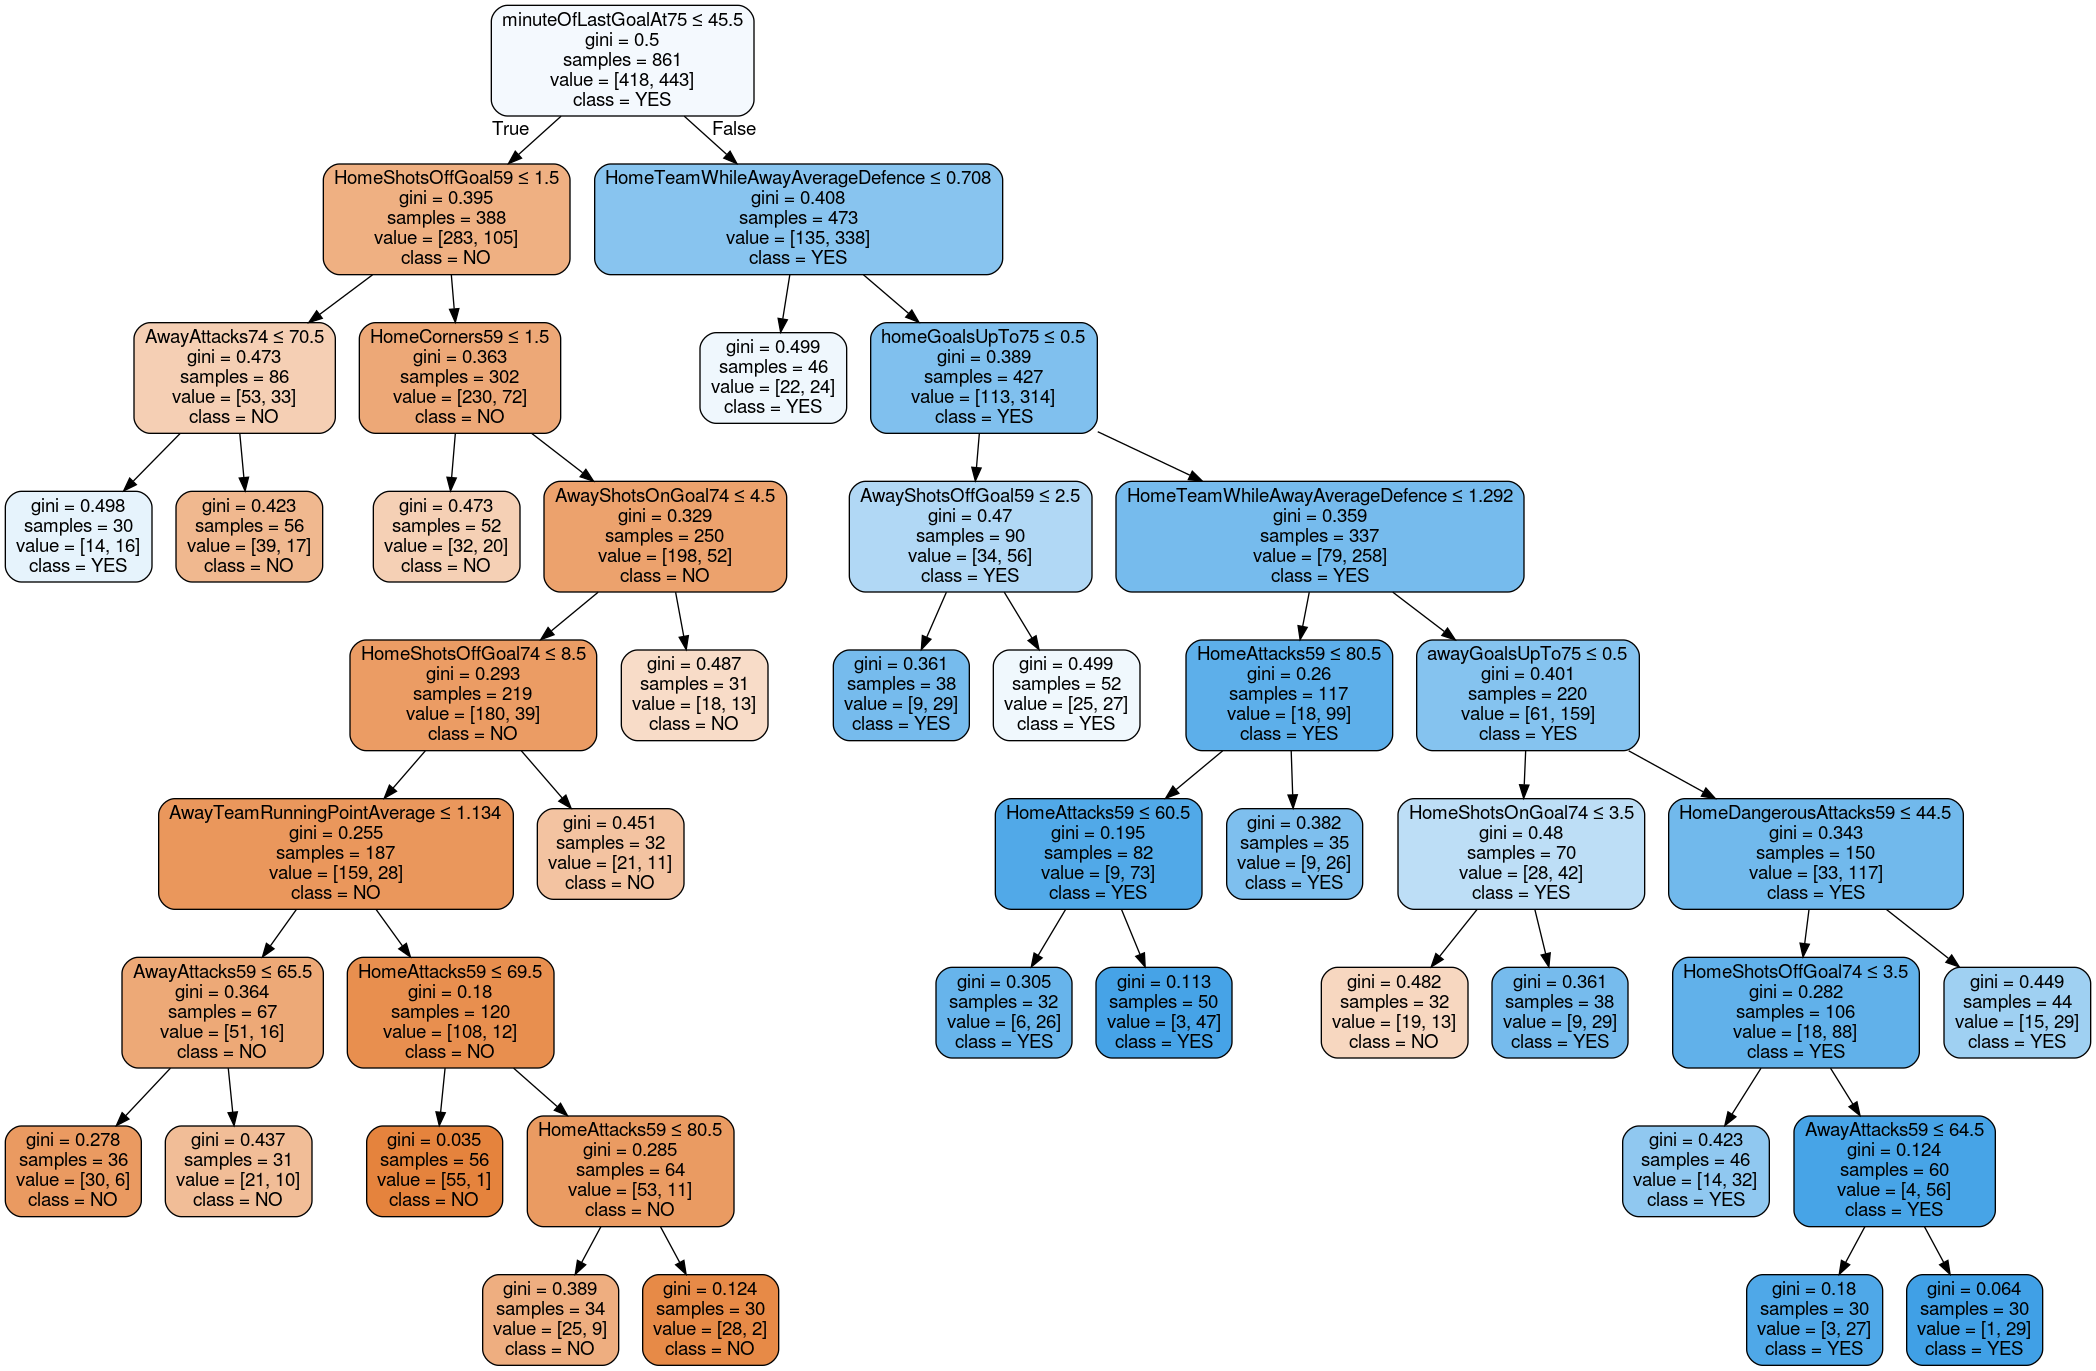

In [281]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier # Import Decision Tree Classifier
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation


def plot_decision_tree(clf,feature_name,target_name):
    dot_data = StringIO()  
    tree.export_graphviz(clf, out_file=dot_data,  
                         feature_names=feature_name,  
                         class_names=target_name,  
                         filled=True, rounded=True,  
                         special_characters=True)  
    graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
    return Image(graph.create_png())



feature_cols = [                       
                    
                                   
                                        
    
                                         'differenceAt75'
                                        ,'differenceAt45'
                                        ,'reddifferenceAt75'
                                        ,'homeGoalsUpTo75'
                                        ,'awayGoalsUpTo75'
                                        ,'homeyellowUpTo75'
                                        ,'awayyellowUpTo75'
                                        ,'minuteOfLastGoalAt75'
    
    
                                        ,'AwayAttacks74'
                                        ,'AwayCorners74'
                                        ,'AwayDangerousAttacks74'
                                        ,'AwayShotsOffGoal74'
                                        ,'AwayShotsOnGoal74'
    
                                        ,'HomeAttacks74'
                                        ,'HomeCorners74'
                                        ,'HomeDangerousAttacks74'
                                        ,'HomeShotsOffGoal74'
                                        ,'HomeShotsOnGoal74'
    
    
                                        ,'AwayAttacks59'
                                        ,'AwayCorners59'
                                        ,'AwayDangerousAttacks59'
                                        ,'AwayShotsOffGoal59'
                                        ,'AwayShotsOnGoal59'
    
                                        ,'HomeAttacks59'
                                        ,'HomeCorners59'
                                        ,'HomeDangerousAttacks59'
                                        ,'HomeShotsOffGoal59'
                                        ,'HomeShotsOnGoal59'
    
    
    
    
                                        ,'AwayTeamRunningPointAverage'
                                        ,'HomeTeamRunningPointAverage'
                                        ,'HomeTeamWhileHomeAverageAttack'
                                        ,'HomeTeamWhileAwayAverageDefence'
                                        ,'AwayTeamWhileAwayAverageAttack'
                                        ,'AwayTeamWhileAwayAverageDefence'
                                       
                                    
               ]
                                        
X = df[feature_cols] # Features
y = df.twoGoalsScoredLast45 # Target variable

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3) # 70% training and 30% test

# Create Decision Tree classifer object
clf = DecisionTreeClassifier(criterion="gini",max_depth=17,min_samples_leaf =30)

# Train Decision Tree Classifer
clf = clf.fit(X_train,y_train)

y_pred = clf.predict(X_test)


print("size:",len(df))
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

plot_decision_tree(clf, X_train.columns,['NO','YES'])
